# Grip : The Spark Foundation

Data Science and Business Analytics Intern

Author : Akshar Kanani

Task 1 : Prediction using Supervised ML


# Step - 1 : Importing the dataset

In [9]:
# Importing required libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignore the warnings 

import warnings as wg
wg.filterwarnings("ignore")

In [10]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [12]:
# check how many rows & columns are present
df.shape

(25, 2)

In [13]:
# For more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
# We can also give df.describe through describe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
# Now we will check if our dataset contains null or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step - 2 : Visulizing the dataset

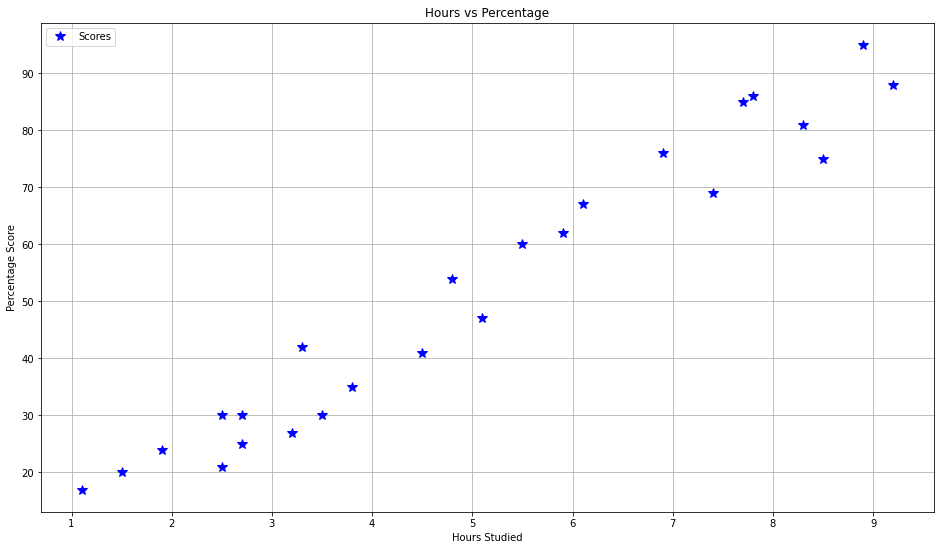

In [20]:
# Ploting

plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours', y='Scores', style = '*', color = 'blue', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [21]:
# We can aslo use .corr to determine the corelation between the variables.
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step - 3 : Data preparation

In [23]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
# using iloc function we will divide the data
x = df.iloc[ :, :1].values
y = df.iloc[ :, 1:].values

In [25]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [32]:
# Spliting data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                            test_size=0.2, random_state=0 )

# Step - 4 : Training the Algorithm

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Step - 5 : Visulizing the model

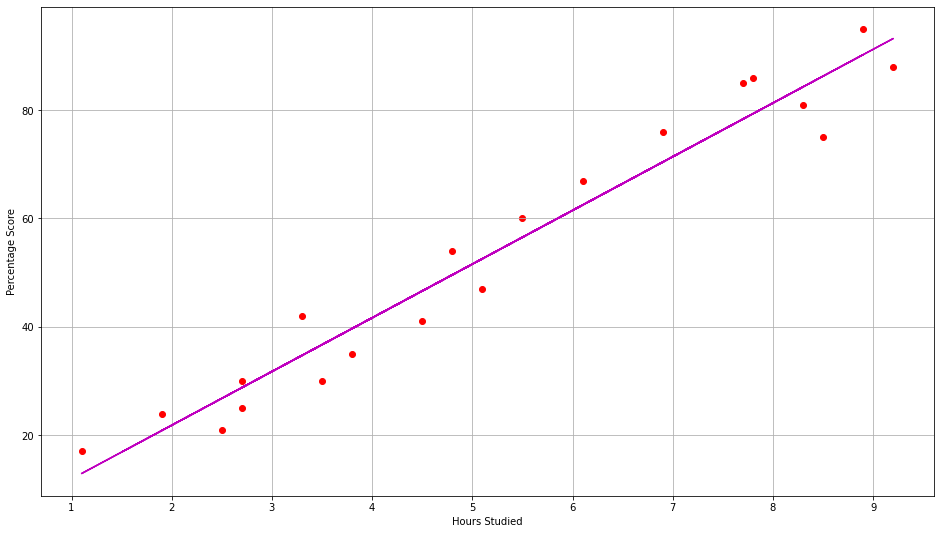

In [53]:
line = model.coef_*x + model.intercept_

# Plotting for the training data

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train, y_train, color='red')
plt.plot(x, line, color='m')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

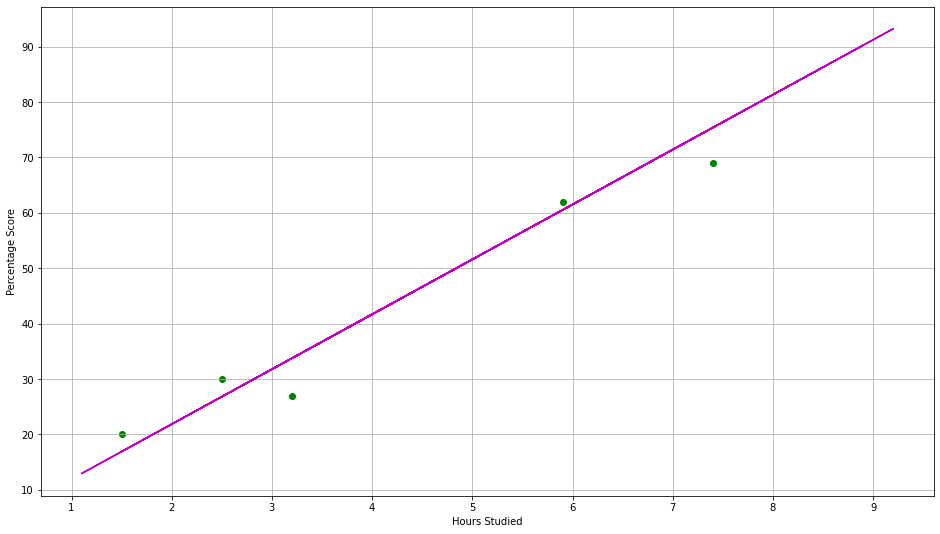

In [52]:
# plotting for the testing data

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test, y_test, color='g')
plt.plot(x, line, color='m')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# Step - 6 : Marking Predictions

In [42]:
print(x_test)   # Testing data - In hours
y_pred = model.predict(x_test)  # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
# Comparing Actual vs Predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [44]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [45]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual' : [y_test], 'Predicted' : [y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [46]:
# Testing with own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


# Step - 7 : Evaluating the model

In [50]:
from sklearn import metrics 
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002975


# Thank You :)